## Data Preprocessing & Data Cleaning Operations

In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
warnings.filterwarnings("ignore")
df = pd.read_excel("/Users/tevfikerkut/Downloads/excel with dataset and example charts.xlsx")

df.columns = df.iloc[1].values
df = df[2:]
df = df.iloc[:,1:]
df = df.dropna(how = "all")[:-1]
df = df.dropna(how = "all", axis = 1)
AMD = df.iloc[:,:8]
TSM = df.iloc[:,8:16]
SHOP = df.iloc[:,16:24]
ACWI = df.iloc[:,24:31]
FTFADGI = df.iloc[:,31:40]
AMD.columns = AMD.columns.str.lower()
TSM.columns = TSM.columns.str.lower()
SHOP.columns = SHOP.columns.str.lower()

ACWI.columns = ACWI.columns.str.lower()
FTFADGI.columns = FTFADGI.columns.str.lower()
def preprocess(data):
    data.date = pd.to_datetime(data.date)
    data["year"] = data.date.dt.year
    data["quarter"] = data.date.dt.quarter
    data["month"] = data.date.dt.month
    
    data["seperator"] = data["year"].astype(str) + data["quarter"].astype(str)
    data.sort_values("seperator", inplace = True)
    le = LabelEncoder()
    data.seperator = le.fit_transform(data.seperator)
    data = data.reset_index(drop=True)
    
    return data.set_index("date")
AMD = preprocess(AMD)
TSM = preprocess(TSM)
SHOP = preprocess(SHOP)
ACWI = preprocess(ACWI)
FTFADGI = preprocess(FTFADGI)

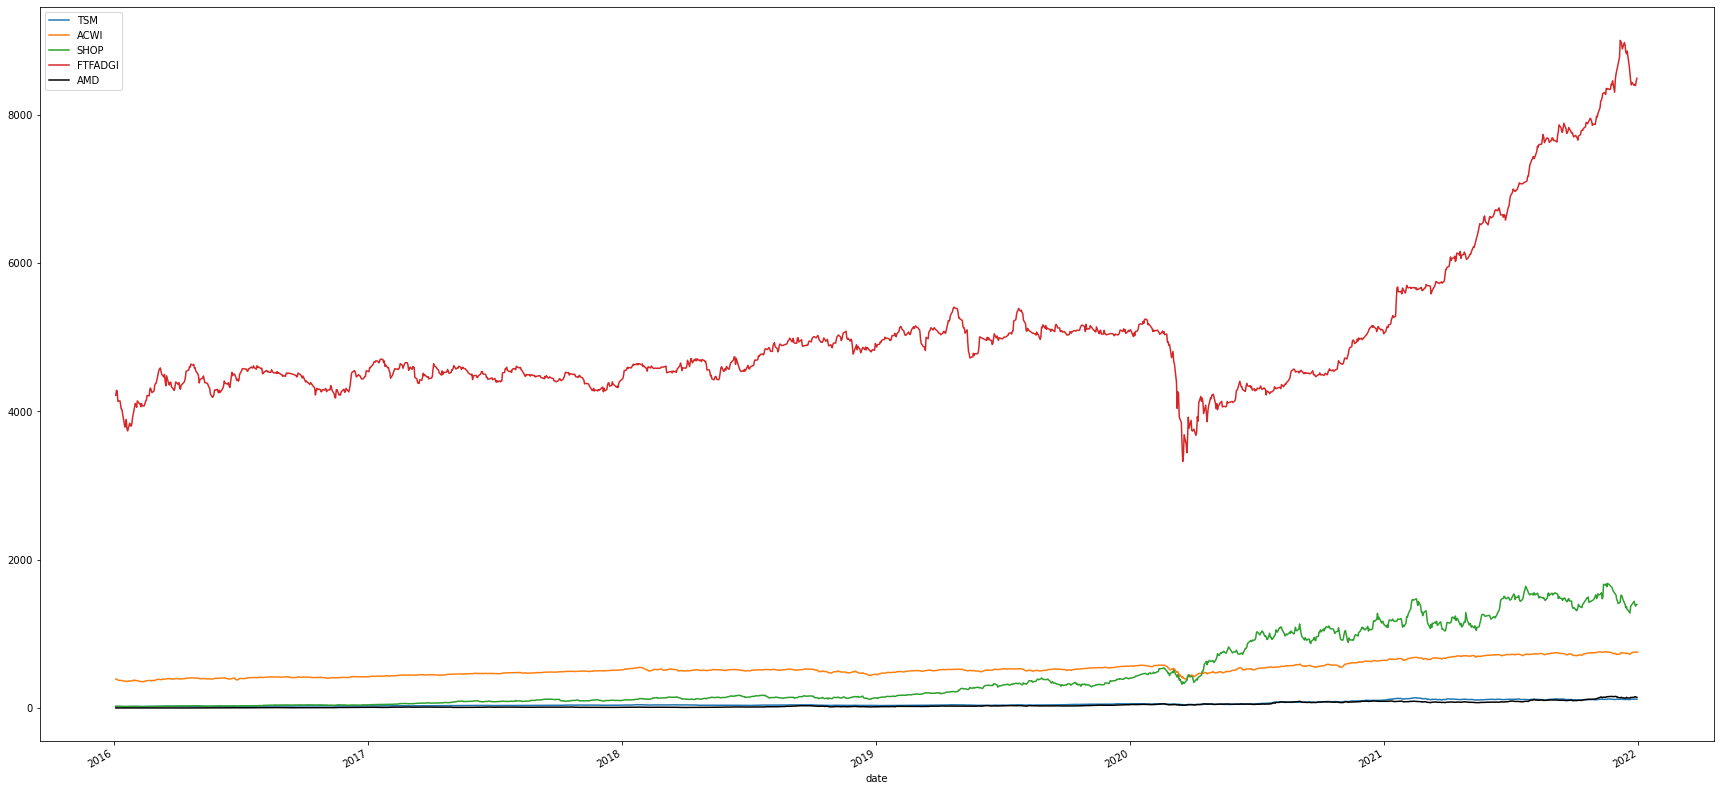

In [2]:
#df['value'].plot()

TSM["close/last"].plot(use_index = True, figsize = (30,15), label = "TSM",legend = True)
ACWI.price.plot(use_index = True, figsize = (30,15), label = "ACWI", legend = True)
SHOP["close/last"].plot(use_index = True, figsize = (30,15), label = "SHOP", legend = True)
FTFADGI.price.plot(use_index = True, figsize = (3,3), label = "FTFADGI", legend = True)
AMD["close/last"].plot(use_index = True, color = "black", label = "AMD", figsize = (30,15), legend = True)
plt.show()

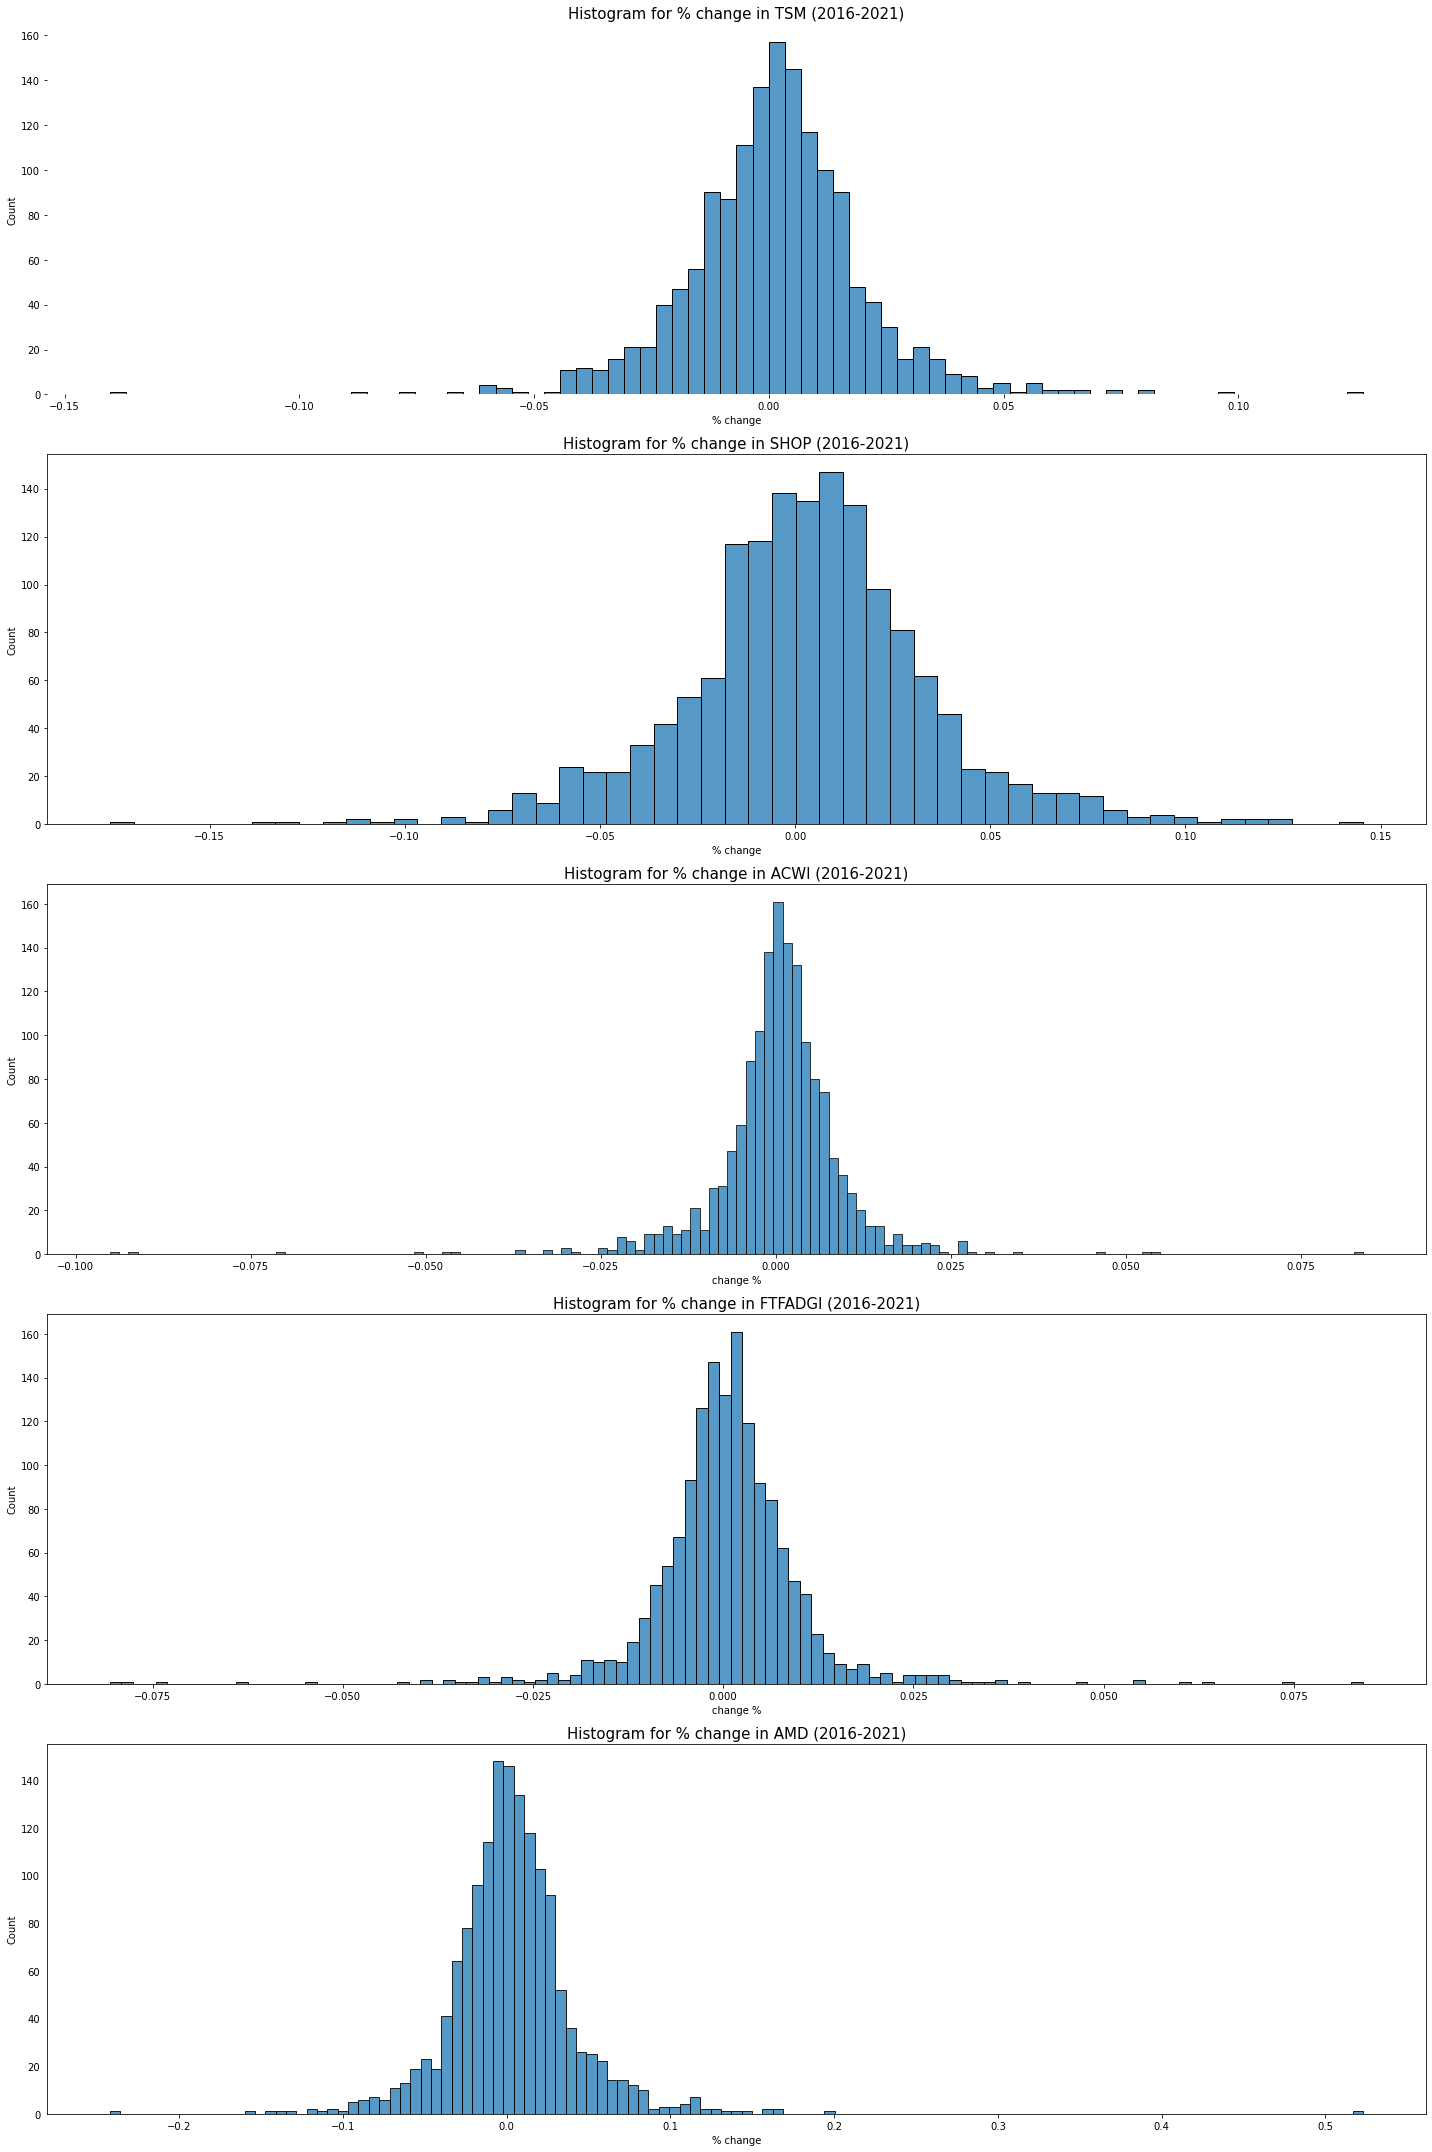

In [3]:
fig, axs = plt.subplots(5,1, figsize = (20, 30))

axs[0].set_title('Histogram for % change in TSM (2016-2021)', fontdict={'fontsize': 15})
sns.histplot(data = TSM,x =  "% change", ax = axs[0])
sns.despine(bottom=True, left=True, ax= axs[0])
plt.tick_params(left=False)

axs[1].set_title('Histogram for % change in SHOP (2016-2021)', fontdict={'fontsize': 15})
sns.histplot(data = SHOP,x =  "% change", ax = axs[1])
sns.despine(bottom=True, left=True, ax= axs[0])
plt.tick_params(left=False)

axs[2].set_title('Histogram for % change in ACWI (2016-2021)', fontdict={'fontsize': 15})
sns.histplot(data = ACWI,x =  "change %", ax = axs[2])
sns.despine(bottom=True, left=True, ax= axs[0])
plt.tick_params(left=False)


axs[3].set_title('Histogram for % change in FTFADGI (2016-2021)', fontdict={'fontsize': 15})
sns.histplot(data = FTFADGI,x =  "change %", ax = axs[3])
sns.despine(bottom=True, left=True, ax= axs[0])
plt.tick_params(left=False)

axs[4].set_title('Histogram for % change in AMD (2016-2021)', fontdict={'fontsize': 15})
sns.histplot(data = AMD,x =  "% change", ax = axs[4])
sns.despine(bottom=True, left=True, ax= axs[0])
plt.tick_params(left=False)

plt.tight_layout()
plt.show()

In [4]:
SHOP.head()

,close/last,volume,open,high,low,$ change,% change,year,quarter,month,seperator
date,,,,,,,,,,,
2016-01-04,25.72,601772,25.42,25.835,24.52,NaN,NaN,2016,1,1,0
2016-02-25,21.66,1271527,21.33,21.83,20.77,0.64,0.030447,2016,1,2,0
2016-02-26,22,1106187,21.69,22.12,21.3201,0.34,0.015697,2016,1,2,0
2016-02-29,22.38,648148,22.03,22.9,21.9,0.38,0.017273,2016,1,2,0
2016-03-01,22.69,692679,22.67,22.87,22.01,0.31,0.013852,2016,1,3,0


In [5]:
ACWI.head()

,price,open,high,low,vol.,change %,year,quarter,month,seperator
date,,,,,,,,,,
2016-01-04,391.16,399.39,399.41,388.29,-,NaN,2016,1,1,0
2016-02-22,374.46,370.02,374.6,369.69,-,0.012766,2016,1,2,0
2016-02-23,370.47,374.52,375.02,370.1,-,-0.010655,2016,1,2,0
2016-02-24,368.77,370.26,370.27,364,-,-0.004589,2016,1,2,0
2016-02-25,372.88,368.65,372.97,368.55,-,0.011145,2016,1,2,0


In [6]:
FTFADGI.head()

,price,open,high,low,vol.,$ change,change %,year,quarter,month,seperator
date,,,,,,,,,,,
2016-01-04,4215.58,4271.57,4271.57,4215.58,63.96M,4215.58,-0.0131,2016,1,1,0
2016-02-22,4297.19,4210.07,4309.93,4210.07,254.28M,88.26,0.021,2016,1,2,0
2016-02-23,4313.57,4299.47,4315.62,4280.04,175.18M,16.38,0.0038,2016,1,2,0
2016-02-24,4282.45,4307.86,4307.86,4272.62,288.75M,-31.12,-0.0072,2016,1,2,0
2016-02-25,4251.18,4282.94,4289.02,4249.56,170.67M,-31.27,-0.0073,2016,1,2,0


### QUESTION 1 ) Point estimates of Mean and Variance 


#####  ACWI

In [7]:
acwi_point_estimates_mean = ACWI.groupby("seperator", as_index= False)["price"].mean()
acwi_point_estimates_mean.columns = ["timeline_number", "point_estimates_mean"]
acwi_point_estimates_mean.head()

,timeline_number,point_estimates_mean
0,0,376.740678
1,1,399.235614
2,2,414.773906
3,3,415.548814
4,4,440.130484


In [8]:
acwi_point_estimates_var = ACWI.groupby("seperator", as_index= False)["price"].var()
acwi_point_estimates_var.columns = ["timeline_number", "point_estimates_var"]
acwi_point_estimates_var.head()

,timeline_number,point_estimates_var
0,0,158.346713
1,1,38.167243
2,2,40.348850
3,3,32.414552
4,4,61.847241


#### TSM

In [9]:
tsm_point_estimates_mean = TSM.groupby("seperator", as_index= False)["close/last"].mean()
tsm_point_estimates_mean.columns = ["timeline_number", "point_estimates_mean"]
tsm_point_estimates_mean.head()

,timeline_number,point_estimates_mean
0,0,23.510893
1,1,24.955781
2,2,28.590000
3,3,30.095873
4,4,31.223226


In [10]:
tsm_point_estimates_var = TSM.groupby("seperator", as_index= False)["close/last"].var()
tsm_point_estimates_var.columns = ["timeline_number", "point_estimates_variance"]
tsm_point_estimates_var.head()

,timeline_number,point_estimates_variance
0,0,3.057572
1,1,1.171110
2,2,1.293746
3,3,0.663631
4,4,1.219507


##### FTFADGI

In [11]:
ftfadgi_point_estimates_mean = FTFADGI.groupby("seperator", as_index= False)["price"].mean()
ftfadgi_point_estimates_mean.columns = ["timeline_number", "point_estimates_mean"]
ftfadgi_point_estimates_mean.head()

,timeline_number,point_estimates_mean
0,0,4195.197187
1,1,4406.737031
2,2,4530.924483
3,3,4344.975323
4,4,4565.530469


In [12]:
ftfadgi_point_estimates_var = FTFADGI.groupby("seperator", as_index= False)["price"].var()
ftfadgi_point_estimates_var.columns = ["timeline_number", "point_estimates_variance"]
ftfadgi_point_estimates_var.head()

,timeline_number,point_estimates_variance
0,0,49912.577109
1,1,12980.091310
2,2,1770.531366
3,3,9393.799973
4,4,7710.062293


##### SHOP

In [13]:
shop_point_estimates_mean = SHOP.groupby("seperator", as_index= False)["close/last"].mean()
shop_point_estimates_mean.columns = ["timeline_number", "point_estimates_mean"]
shop_point_estimates_mean.head()

,timeline_number,point_estimates_mean
0,0,23.834464
1,1,29.211562
2,2,38.154219
3,3,42.032381
4,4,57.585645


In [14]:
shop_point_estimates_var = SHOP.groupby("seperator", as_index= False)["close/last"].var()
shop_point_estimates_var.columns = ["timeline_number", "point_estimates_variance"]
shop_point_estimates_var.head()

,timeline_number,point_estimates_variance
0,0,7.354200
1,1,3.086382
2,2,20.639187
3,3,2.209173
4,4,61.530310


##### AMD

In [15]:
amd_point_estimates_mean = AMD.groupby("seperator", as_index= False)["close/last"].mean()
amd_point_estimates_mean.columns = ["timeline_number", "point_estimates_mean"]
amd_point_estimates_mean.head()

,timeline_number,point_estimates_mean
0,0,2.296786
1,1,3.885312
2,2,6.384219
3,3,8.385635
4,4,12.693871


In [16]:
amd_point_estimates_var= AMD.groupby("seperator", as_index= False)["close/last"].var()
amd_point_estimates_var.columns = ["timeline_number", "point_estimates_variance"]
amd_point_estimates_var.head()

,timeline_number,point_estimates_variance
0,0,0.114038
1,1,0.653175
2,2,0.657208
3,3,3.295574
4,4,2.432726


In [17]:
acwi_point_estimates_var

,timeline_number,point_estimates_var
0,0,158.346713
1,1,38.167243
2,2,40.348850
3,3,32.414552
4,4,61.847241
5,5,61.013753
6,6,37.881696
7,7,43.568658
8,8,166.946512
9,9,31.766127


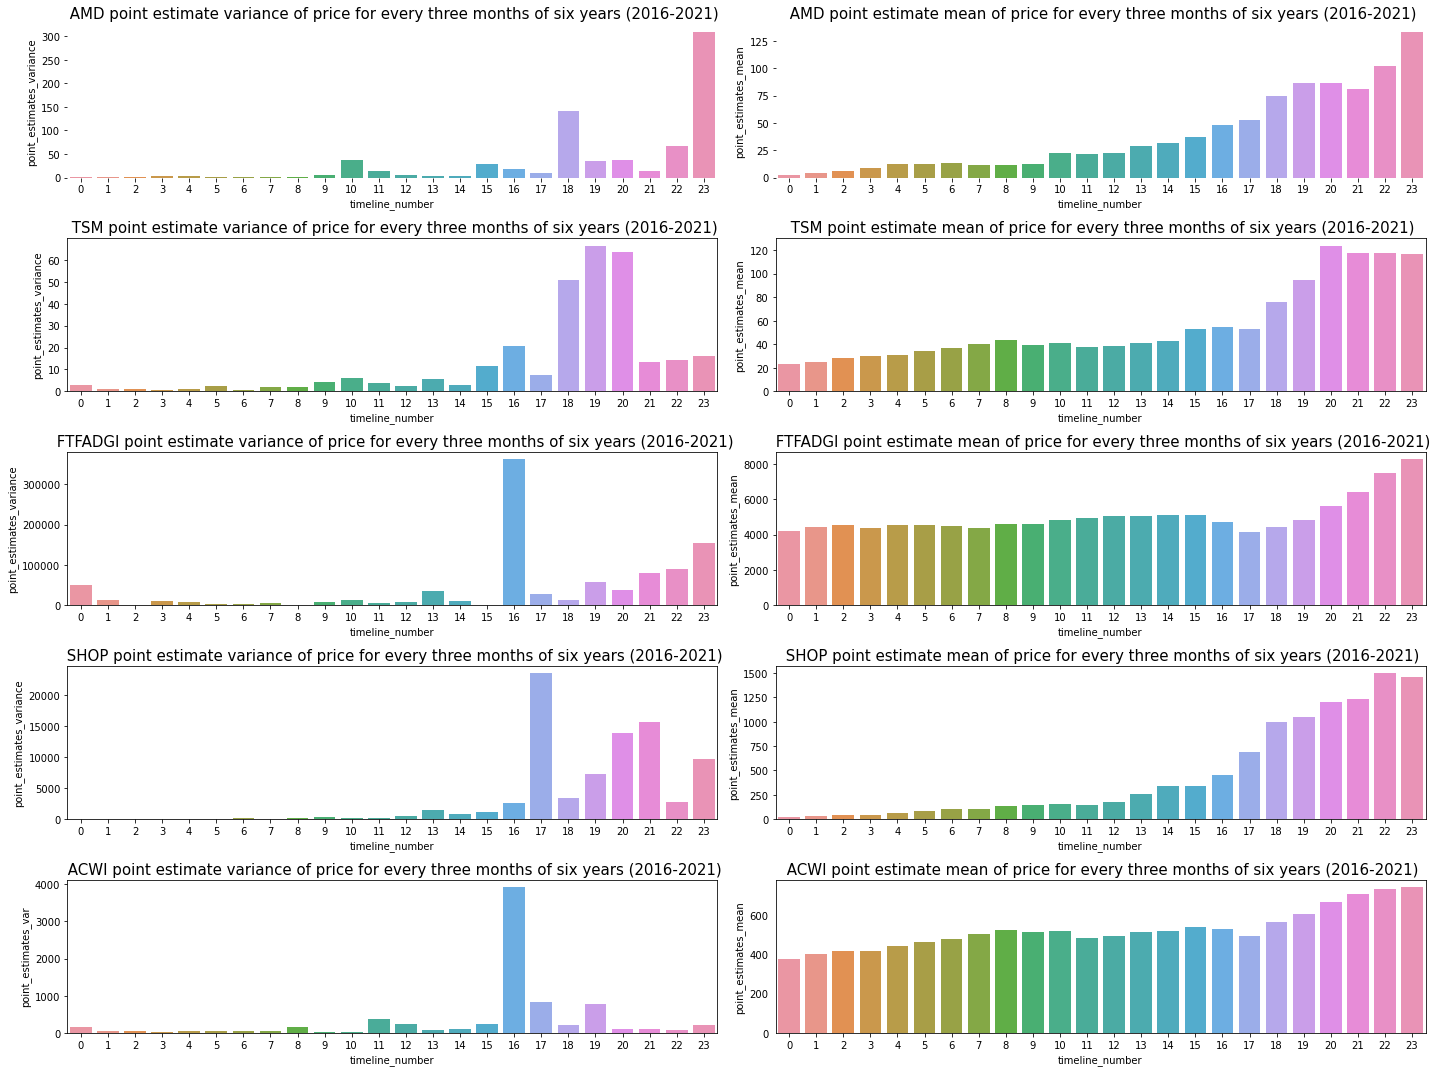

In [18]:
#  subplot #2
fig, axs = plt.subplots(5,2, figsize = (20, 15))

axs[0,0].set_title(' AMD point estimate variance of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(amd_point_estimates_var.timeline_number, amd_point_estimates_var.point_estimates_variance, ax= axs[0,0])
sns.despine(bottom=True, left=True, ax= axs[0,0])
plt.tick_params(left=False)

axs[0,1].set_title(' AMD point estimate mean of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(amd_point_estimates_mean.timeline_number, amd_point_estimates_mean.point_estimates_mean, ax= axs[0,1])
sns.despine(bottom=True, left=True, ax= axs[0,1])
plt.tick_params(left=False)

axs[1,0].set_title(' TSM point estimate variance of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(tsm_point_estimates_var.timeline_number, tsm_point_estimates_var.point_estimates_variance, ax= axs[1,0])
sns.despine(bottom=True, left=True, ax= axs[0,0])
plt.tick_params(left=False)

axs[1,1].set_title(' TSM point estimate mean of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(tsm_point_estimates_mean.timeline_number, tsm_point_estimates_mean.point_estimates_mean, ax= axs[1,1])
sns.despine(bottom=True, left=True, ax= axs[0,1])
plt.tick_params(left=False)

axs[2,0].set_title(' FTFADGI point estimate variance of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(ftfadgi_point_estimates_var.timeline_number, ftfadgi_point_estimates_var.point_estimates_variance, ax= axs[2,0])
sns.despine(bottom=True, left=True, ax= axs[0,0])
plt.tick_params(left=False)

axs[2,1].set_title(' FTFADGI point estimate mean of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(ftfadgi_point_estimates_mean.timeline_number, ftfadgi_point_estimates_mean.point_estimates_mean, ax= axs[2,1])
sns.despine(bottom=True, left=True, ax= axs[0,1])
plt.tick_params(left=False)


axs[3,0].set_title(' SHOP point estimate variance of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(shop_point_estimates_var.timeline_number, shop_point_estimates_var.point_estimates_variance, ax= axs[3,0])
sns.despine(bottom=True, left=True, ax= axs[0,0])
plt.tick_params(left=False)

axs[3,1].set_title(' SHOP point estimate mean of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(shop_point_estimates_mean.timeline_number, shop_point_estimates_mean.point_estimates_mean, ax= axs[3,1])
sns.despine(bottom=True, left=True, ax= axs[0,1])
plt.tick_params(left=False)

axs[4,0].set_title(' ACWI point estimate variance of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(acwi_point_estimates_var.timeline_number, acwi_point_estimates_var.point_estimates_var, ax= axs[4,0])
sns.despine(bottom=True, left=True, ax= axs[0,0])
plt.tick_params(left=False)

axs[4,1].set_title(' ACWI point estimate mean of price for every three months of six years (2016-2021)', fontdict={'fontsize': 15})
sns.barplot(acwi_point_estimates_mean.timeline_number, acwi_point_estimates_mean.point_estimates_mean, ax= axs[4,1])
sns.despine(bottom=True, left=True, ax= axs[0,1])
plt.tick_params(left=False)

plt.tight_layout()
plt.show()


### Question 2) Interval estimation of price by quarter

#### a.	Now for each timeseries and quarter, calculate the 90/95/99% confidence intervals for the mean price. 

#### TSM

In [19]:
import math

z_critical = stats.norm.ppf(q = 0.90)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = tsm_point_estimates_mean.point_estimates_mean.std()  # Get the prices standard deviation
pe_mean = tsm_point_estimates_mean.point_estimates_mean.mean() 
margin_of_error = z_critical * (pop_stdev/math.sqrt(len(tsm_point_estimates_mean)))

confidence_interval_tsm_90 = (pe_mean - margin_of_error,
                       pe_mean + margin_of_error)  

print("Confidence interval 90:")
print(confidence_interval_tsm_90)

z-critical value:
1.2815515655446004
Confidence interval 90:
(47.33123862994841, 64.42922497775528)


In [20]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.90)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(tsm_point_estimates_mean.iloc[:i,:])))

        confidence_interval_tsm_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_tsm_90[0]
        ti = confidence_interval_tsm_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 90 for Quarter 1:")
        print(confidence_interval_tsm_90)
    else:
        
        pop_stdev = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(tsm_point_estimates_mean.iloc[:i,:])))

        confidence_interval_tsm_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_tsm_90[0]
        ti = confidence_interval_tsm_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 90 for Quarter:", i)
        print(confidence_interval_tsm_90)

Confidence interval 90 for Quarter 1:
(22.22934129159826, 24.79244442268746)
Confidence interval 90 for Quarter: 2
(23.307487562619787, 25.159186544523077)
Confidence interval 90 for Quarter: 3
(23.749218442501135, 27.621897628927446)
Confidence interval 90 for Quarter: 4
(24.82057304434033, 28.75570051716761)
Confidence interval 90 for Quarter: 5
(25.77383783494865, 29.57647133683834)
Confidence interval 90 for Quarter: 6
(26.684569763460765, 30.96550269450988)
Confidence interval 90 for Quarter: 7
(27.631472929618763, 32.21738736315427)
Confidence interval 90 for Quarter: 8
(28.63653829582308, 33.86101604765491)
Confidence interval 90 for Quarter: 9
(29.72238958844559, 35.51656582069331)
Confidence interval 90 for Quarter: 10
(30.57139168240359, 36.04713693582142)
Confidence interval 90 for Quarter: 11
(31.396053732610827, 36.69752928251437)
Confidence interval 90 for Quarter: 12
(31.924181116819764, 36.83930172641007)
Confidence interval 90 for Quarter: 13
(32.38043264064966, 36.962

In [21]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(tsm_point_estimates_mean.iloc[:i,:])))

        confidence_interval_tsm_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_tsm_95[0]
        ti = confidence_interval_tsm_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 95 for Quarter 1:")
        print(confidence_interval_tsm_95)
    else:
        
        pop_stdev = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(tsm_point_estimates_mean.iloc[:i,:])))

        confidence_interval_tsm_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_tsm_95[0]
        ti = confidence_interval_tsm_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 95 for Quarter:", i)
        print(confidence_interval_tsm_95)

Confidence interval 95 for Quarter 1:
(21.866039230191387, 25.155746484094333)
Confidence interval 95 for Quarter: 2
(23.045022096805855, 25.42165201033701)
Confidence interval 95 for Quarter: 3
(23.200293073665794, 28.170822997762787)
Confidence interval 95 for Quarter: 4
(24.262796064773596, 29.313477496734343)
Confidence interval 95 for Quarter: 5
(25.23484095524671, 30.11546821654028)
Confidence interval 95 for Quarter: 6
(26.0777772627104, 31.572295195260246)
Confidence interval 95 for Quarter: 7
(26.981451419781592, 32.86740887299144)
Confidence interval 95 for Quarter: 8
(27.89600487210234, 34.60154947137565)
Confidence interval 95 for Quarter: 9
(28.901105363165215, 36.33785004597368)
Confidence interval 95 for Quarter: 10
(29.795242836040078, 36.82328578218494)
Confidence interval 95 for Quarter: 11
(30.64460640596361, 37.448976609161576)
Confidence interval 95 for Quarter: 12
(31.227496918720902, 37.535985924508935)
Confidence interval 95 for Quarter: 13
(31.730998635677512, 

In [22]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.99)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(tsm_point_estimates_mean.iloc[:i,:])))

        confidence_interval_tsm_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_tsm_99[0]
        ti = confidence_interval_tsm_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 99 for Quarter 1:")
        print(confidence_interval_tsm_99)
    else:
        
        pop_stdev = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = tsm_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(tsm_point_estimates_mean.iloc[:i,:])))

        confidence_interval_tsm_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_tsm_99[0]
        ti = confidence_interval_tsm_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 99 for Quarter:", i)
        print(confidence_interval_tsm_99)

Confidence interval 99 for Quarter 1:
(21.18454498310202, 25.8372407311837)
Confidence interval 99 for Quarter: 2
(22.552680533096684, 25.91399357404618)
Confidence interval 99 for Quarter: 3
(22.170600372517743, 29.200515698910838)
Confidence interval 99 for Quarter: 4
(23.21649921398886, 30.359774347519078)
Confidence interval 99 for Quarter: 5
(24.22377244852382, 31.12653672326317)
Confidence interval 99 for Quarter: 6
(24.939535445868003, 32.71053701210264)
Confidence interval 99 for Quarter: 7
(25.76211917123081, 34.08674112154222)
Confidence interval 99 for Quarter: 8
(26.506887325978955, 35.99066701749903)
Confidence interval 99 for Quarter: 9
(27.360512742835983, 37.87844266630291)
Confidence interval 99 for Quarter: 10
(28.339316680175497, 38.279211938049514)
Confidence interval 99 for Quarter: 11
(29.23501619302166, 38.85856682210353)
Confidence interval 99 for Quarter: 12
(29.920633227378623, 38.842849615851215)
Confidence interval 99 for Quarter: 13
(30.51276844854664, 38.8

In [23]:
idx_list = TSM.drop_duplicates(subset = ["quarter", "year"]).index

<ErrorbarContainer object of 3 artists>

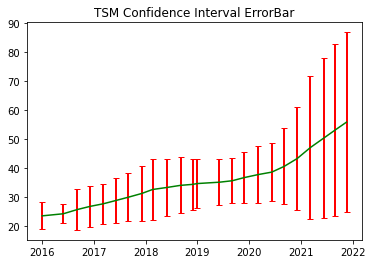

In [24]:
plt.title("TSM Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

#### AMD

In [25]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.90)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(amd_point_estimates_mean.iloc[:i,:])))

        confidence_interval_amd_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_amd_90[0]
        ti = confidence_interval_amd_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 90 for Quarter 1:")
        print(confidence_interval_amd_90)
    else:
        
        pop_stdev = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(amd_point_estimates_mean.iloc[:i,:])))

        confidence_interval_amd_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_amd_90[0]
        ti = confidence_interval_amd_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 90 for Quarter:", i)
        print(confidence_interval_amd_90)

Confidence interval 90 for Quarter 1:
(1.0152341487411136, 3.5783372798303144)
Confidence interval 90 for Quarter: 2
(2.0731596125720193, 4.108938601713694)
Confidence interval 90 for Quarter: 3
(2.664167008268991, 5.713377634588152)
Confidence interval 90 for Quarter: 4
(3.5145541110282075, 6.96142183143211)
Confidence interval 90 for Quarter: 5
(4.398042335108153, 9.060286805956874)
Confidence interval 90 for Quarter: 6
(5.408848564638591, 9.881055349211895)
Confidence interval 90 for Quarter: 7
(6.283696545973048, 10.549735833699252)
Confidence interval 90 for Quarter: 8
(6.905311215425032, 10.745410370756483)
Confidence interval 90 for Quarter: 9
(7.414753300149183, 10.909749676274458)
Confidence interval 90 for Quarter: 10
(7.889391469654172, 11.145161209127105)
Confidence interval 90 for Quarter: 11
(8.587090410586592, 12.820078691335782)
Confidence interval 90 for Quarter: 12
(9.3567950460866, 13.870252821151766)
Confidence interval 90 for Quarter: 13
(10.120388094459297, 14.812

In [26]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(amd_point_estimates_mean.iloc[:i,:])))

        confidence_interval_amd_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_amd_95[0]
        ti = confidence_interval_amd_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 95 for Quarter 1:")
        print(confidence_interval_amd_95)
    else:
        
        pop_stdev = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(amd_point_estimates_mean.iloc[:i,:])))

        confidence_interval_amd_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_amd_95[0]
        ti = confidence_interval_amd_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 95 for Quarter:", i)
        print(confidence_interval_amd_95)

Confidence interval 95 for Quarter 1:
(0.6519320873342418, 3.9416393412371864)
Confidence interval 95 for Quarter: 2
(1.7846020846470034, 4.39749612963871)
Confidence interval 95 for Quarter: 3
(2.2319625866955475, 6.145582056161596)
Confidence interval 95 for Quarter: 4
(3.0259845591321852, 7.449991383328133)
Confidence interval 95 for Quarter: 5
(3.737201572792692, 9.721127568272335)
Confidence interval 95 for Quarter: 6
(4.774944324046121, 10.514959589804365)
Confidence interval 95 for Quarter: 7
(5.679015115688574, 11.154417263983724)
Confidence interval 95 for Quarter: 8
(6.361003839644236, 11.289717746537278)
Confidence interval 95 for Quarter: 9
(6.919361845683486, 11.405141130740155)
Confidence interval 95 for Quarter: 10
(7.427908728882059, 11.606643949899219)
Confidence interval 95 for Quarter: 11
(7.9870937309158085, 13.420075371006565)
Confidence interval 95 for Quarter: 12
(8.717043764187448, 14.510004103050917)
Confidence interval 95 for Quarter: 13
(9.455296174583756, 15

In [27]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.99)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(amd_point_estimates_mean.iloc[:i,:])))

        confidence_interval_amd_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_amd_99[0]
        ti = confidence_interval_amd_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 99 for Quarter 1:")
        print(confidence_interval_amd_99)
    else:
        
        pop_stdev = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = amd_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(amd_point_estimates_mean.iloc[:i,:])))

        confidence_interval_amd_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_amd_99[0]
        ti = confidence_interval_amd_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 99 for Quarter:", i)
        print(confidence_interval_amd_99)

Confidence interval 99 for Quarter 1:
(-0.02956215975512677, 4.623133588326555)
Confidence interval 99 for Quarter: 2
(1.2433161517411775, 4.9387820625445364)
Confidence interval 99 for Quarter: 3
(1.4212189709608127, 6.956325671896331)
Confidence interval 99 for Quarter: 4
(2.109509332895354, 8.366466609564963)
Confidence interval 99 for Quarter: 5
(2.4975742059229793, 10.960754935142049)
Confidence interval 99 for Quarter: 6
(3.585845392164445, 11.70405852168604)
Confidence interval 99 for Quarter: 7
(4.544733315951872, 12.288699063720427)
Confidence interval 99 for Quarter: 8
(5.3399737254564315, 12.310747860725083)
Confidence interval 99 for Quarter: 9
(5.990089864764247, 12.334413111659394)
Confidence interval 99 for Quarter: 10
(6.562243855555025, 12.472308823226253)
Confidence interval 99 for Quarter: 11
(6.861599744217973, 14.545569357704402)
Confidence interval 99 for Quarter: 12
(7.516976755225315, 15.71007111201305)
Confidence interval 99 for Quarter: 13
(8.20769434313367, 1

<ErrorbarContainer object of 3 artists>

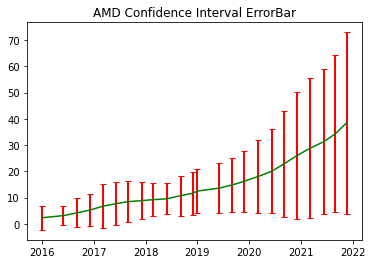

In [28]:
plt.title("AMD Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

#### SHOP

In [29]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.90)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(shop_point_estimates_mean.iloc[:i,:])))

        confidence_interval_shop_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_shop_90[0]
        ti = confidence_interval_shop_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 90 for Quarter 1:")
        print(confidence_interval_shop_90)
    else:
        
        pop_stdev = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(shop_point_estimates_mean.iloc[:i,:])))

        confidence_interval_shop_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_shop_90[0]
        ti = confidence_interval_shop_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 90 for Quarter:", i)
        print(confidence_interval_shop_90)

Confidence interval 90 for Quarter 1:
(22.552912720169672, 25.116015851258872)
Confidence interval 90 for Quarter: 2
(23.077499075554663, 29.968527710159606)
Confidence interval 90 for Quarter: 3
(25.047997850743485, 35.7521658397327)
Confidence interval 90 for Quarter: 4
(27.996678867288537, 38.619634376759066)
Confidence interval 90 for Quarter: 5
(30.70393157745521, 45.623377082298994)
Confidence interval 90 for Quarter: 6
(34.263986135040916, 57.536654679304526)
Confidence interval 90 for Quarter: 7
(39.696022636694835, 68.16833615655362)
Confidence interval 90 for Quarter: 8
(45.422366875463354, 74.569701036883)
Confidence interval 90 for Quarter: 9
(51.49532364789582, 83.92687879513701)
Confidence interval 90 for Quarter: 10
(57.776622771583476, 92.40960942714608)
Confidence interval 90 for Quarter: 11
(64.05022727326043, 100.1774874239973)
Confidence interval 90 for Quarter: 12
(69.35830216516628, 104.63062149250517)
Confidence interval 90 for Quarter: 13
(75.414007998623, 112.3

In [30]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(shop_point_estimates_mean.iloc[:i,:])))

        confidence_interval_shop_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_shop_95[0]
        ti = confidence_interval_shop_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 95 for Quarter 1:")
        print(confidence_interval_shop_95)
    else:
        
        pop_stdev = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(shop_point_estimates_mean.iloc[:i,:])))

        confidence_interval_shop_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_shop_95[0]
        ti = confidence_interval_shop_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 95 for Quarter:", i)
        print(confidence_interval_shop_95)

Confidence interval 95 for Quarter 1:
(22.1896106587628, 25.479317912665746)
Confidence interval 95 for Quarter: 2
(22.100743642736056, 30.945283142978212)
Confidence interval 95 for Quarter: 3
(23.53075640662233, 37.26940728385385)
Confidence interval 95 for Quarter: 4
(26.490948727907025, 40.12536451614058)
Confidence interval 95 for Quarter: 5
(28.58920383153971, 47.7381048282145)
Confidence interval 95 for Quarter: 6
(30.96524705817168, 60.83539375617376)
Confidence interval 95 for Quarter: 7
(35.66027000960811, 72.20408878364034)
Confidence interval 95 for Quarter: 8
(41.29093476221135, 78.701133150135)
Confidence interval 95 for Quarter: 9
(46.89837602736978, 88.52382641566305)
Confidence interval 95 for Quarter: 10
(52.867637529426744, 97.31859466930281)
Confidence interval 95 for Quarter: 11
(58.92943914478295, 105.29827555247479)
Confidence interval 95 for Quarter: 12
(64.35869595861536, 109.63022769905609)
Confidence interval 95 for Quarter: 13
(70.17804905852613, 117.5897594

In [31]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.99)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(shop_point_estimates_mean.iloc[:i,:])))

        confidence_interval_shop_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_shop_99[0]
        ti = confidence_interval_shop_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 99 for Quarter 1:")
        print(confidence_interval_shop_99)
    else:
        
        pop_stdev = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = shop_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(shop_point_estimates_mean.iloc[:i,:])))

        confidence_interval_shop_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_shop_99[0]
        ti = confidence_interval_shop_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 99 for Quarter:", i)
        print(confidence_interval_shop_99)

Confidence interval 99 for Quarter 1:
(21.50811641167343, 26.160812159755114)
Confidence interval 99 for Quarter: 2
(20.26851289320094, 32.777513892513326)
Confidence interval 99 for Quarter: 3
(20.684663787136373, 40.11549990333981)
Confidence interval 99 for Quarter: 4
(23.666449401688332, 42.94986384235927)
Confidence interval 99 for Quarter: 5
(24.622326276755693, 51.704982382998516)
Confidence interval 99 for Quarter: 6
(24.77736115730529, 67.02327965704015)
Confidence interval 99 for Quarter: 7
(28.089869259926644, 79.77448953332181)
Confidence interval 99 for Quarter: 8
(33.54105520876641, 86.45101270357995)
Confidence interval 99 for Quarter: 9
(38.275266801322296, 97.14693564171054)
Confidence interval 99 for Quarter: 10
(43.65919761961362, 106.52703457911593)
Confidence interval 99 for Quarter: 11
(49.32369224478771, 114.90402245247003)
Confidence interval 99 for Quarter: 12
(54.9802661906077, 119.00865746706376)
Confidence interval 99 for Quarter: 13
(60.35626086978266, 127.

<ErrorbarContainer object of 3 artists>

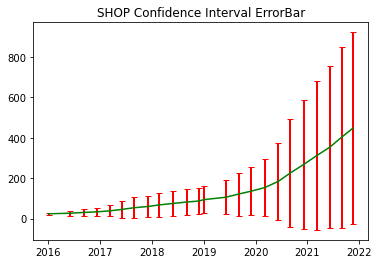

In [32]:
plt.title("SHOP Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

#### FTFADGI

In [33]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.90)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(ftfadgi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_ftfadgi_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_ftfadgi_90[0]
        ti = confidence_interval_ftfadgi_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 90 for Quarter 1:")
        print(confidence_interval_ftfadgi_90)
    else:
        
        pop_stdev = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(ftfadgi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_ftfadgi_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_ftfadgi_90[0]
        ti = confidence_interval_ftfadgi_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 90 for Quarter:", i)
        print(confidence_interval_ftfadgi_90)

Confidence interval 90 for Quarter 1:
(4193.915635934455, 4196.478739065545)
Confidence interval 90 for Quarter: 2
(4165.417500408564, 4436.516718341437)
Confidence interval 90 for Quarter: 3
(4252.022993020835, 4503.216141318246)
Confidence interval 90 for Quarter: 4
(4280.034590601633, 4458.882421443)
Confidence interval 90 for Quarter: 5
(4323.095017277345, 4494.250779858361)
Confidence interval 90 for Quarter: 6
(4354.15957086346, 4502.876899427222)
Confidence interval 90 for Quarter: 7
(4373.392048592866, 4501.043727785324)
Confidence interval 90 for Quarter: 8
(4376.001542085244, 4487.444643198053)
Confidence interval 90 for Quarter: 9
(4394.831197788233, 4502.048092128491)
Confidence interval 90 for Quarter: 10
(4411.732734628026, 4514.962876297023)
Confidence interval 90 for Quarter: 11
(4433.462893599174, 4560.866648374419)
Confidence interval 90 for Quarter: 12
(4458.828423261321, 4606.475614553096)
Confidence interval 90 for Quarter: 13
(4487.122486376464, 4654.460532656136)

In [34]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(ftfadgi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_ftfadgi_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_ftfadgi_95[0]
        ti = confidence_interval_ftfadgi_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 95 for Quarter 1:")
        print(confidence_interval_ftfadgi_95)
    else:
        
        pop_stdev = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(ftfadgi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_ftfadgi_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_ftfadgi_95[0]
        ti = confidence_interval_ftfadgi_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 95 for Quarter:", i)
        print(confidence_interval_ftfadgi_95)

Confidence interval 95 for Quarter 1:
(4193.552333873048, 4196.842041126952)
Confidence interval 95 for Quarter: 2
(4126.991069756532, 4474.943148993469)
Confidence interval 95 for Quarter: 3
(4216.418109440146, 4538.821024898935)
Confidence interval 95 for Quarter: 4
(4254.684153143736, 4484.232858900897)
Confidence interval 95 for Quarter: 5
(4298.83487705391, 4518.510920081796)
Confidence interval 95 for Quarter: 6
(4333.079922768622, 4523.956547522061)
Confidence interval 95 for Quarter: 7
(4355.298309940625, 4519.137466437565)
Confidence interval 95 for Quarter: 8
(4360.205256765015, 4503.240928518282)
Confidence interval 95 for Quarter: 9
(4379.633947916003, 4517.2453420007205)
Confidence interval 95 for Quarter: 10
(4397.1005792485685, 4529.595031676481)
Confidence interval 95 for Quarter: 11
(4415.404296510593, 4578.9252454630005)
Confidence interval 95 for Quarter: 12
(4437.9004596898985, 4627.403578124519)
Confidence interval 95 for Quarter: 13
(4463.403480914764, 4678.179538

In [35]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.99)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(ftfadgi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_ftfadgi_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_ftfadgi_99[0]
        ti = confidence_interval_ftfadgi_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 99 for Quarter 1:")
        print(confidence_interval_ftfadgi_99)
    else:
        
        pop_stdev = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = ftfadgi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(ftfadgi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_ftfadgi_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_ftfadgi_99[0]
        ti = confidence_interval_ftfadgi_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 99 for Quarter:", i)
        print(confidence_interval_ftfadgi_99)

Confidence interval 99 for Quarter 1:
(4192.870839625959, 4197.523535374041)
Confidence interval 99 for Quarter: 2
(4054.9094764836273, 4547.024742266373)
Confidence interval 99 for Quarter: 3
(4149.62926922668, 4605.609865112401)
Confidence interval 99 for Quarter: 4
(4207.130948458208, 4531.7860635864245)
Confidence interval 99 for Quarter: 5
(4253.326888654867, 4564.018908480839)
Confidence interval 99 for Quarter: 6
(4293.538008660924, 4563.498461629759)
Confidence interval 99 for Quarter: 7
(4321.35746536603, 4553.07831101216)
Confidence interval 99 for Quarter: 8
(4330.574052555958, 4532.87213272734)
Confidence interval 99 for Quarter: 9
(4351.126434582888, 4545.752855333836)
Confidence interval 99 for Quarter: 10
(4369.653089204051, 4557.042521720999)
Confidence interval 99 for Quarter: 11
(4381.529371665092, 4612.800170308501)
Confidence interval 99 for Quarter: 12
(4398.643080521746, 4666.660957292672)
Confidence interval 99 for Quarter: 13
(4418.910571333592, 4722.67244769900

<ErrorbarContainer object of 3 artists>

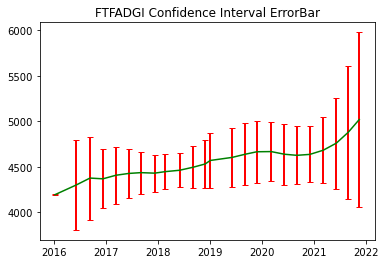

In [36]:
plt.title("FTFADGI Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

#### ACWI

In [37]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.90)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(acwi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_acwi_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_acwi_90[0]
        ti = confidence_interval_acwi_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 90 for Quarter 1:")
        print(confidence_interval_acwi_90)
    else:
        
        pop_stdev = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(acwi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_acwi_90 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_acwi_90[0]
        ti = confidence_interval_acwi_90[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 90 for Quarter:", i)
        print(confidence_interval_acwi_90)

Confidence interval 90 for Quarter 1:
(375.4591264005572, 378.02222953164636)
Confidence interval 90 for Quarter: 2
(373.5739357325774, 402.40235626861204)
Confidence interval 90 for Quarter: 3
(382.7680219233596, 411.06544357743337)
Confidence interval 90 for Quarter: 4
(389.9245230537947, 413.22498285146105)
Confidence interval 90 for Quarter: 5
(395.9032531826, 422.66854508999165)
Confidence interval 90 for Quarter: 6
(402.3398441007971, 432.8928978459394)
Confidence interval 90 for Quarter: 7
(409.22590921034976, 443.03018252630875)
Confidence interval 90 for Quarter: 8
(416.53926314139255, 454.1860472869139)
Confidence interval 90 for Quarter: 9
(424.329725407777, 465.8496033518105)
Confidence interval 90 for Quarter: 10
(431.328295625378, 472.2339752582508)
Confidence interval 90 for Quarter: 11
(437.74469044412257, 477.8104187285847)
Confidence interval 90 for Quarter: 12
(441.4675076717589, 478.47128949316993)
Confidence interval 90 for Quarter: 13
(445.13952997359746, 479.7687

In [38]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(acwi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_acwi_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_acwi_95[0]
        ti = confidence_interval_acwi_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 95 for Quarter 1:")
        print(confidence_interval_acwi_95)
    else:
        
        pop_stdev = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(acwi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_acwi_95 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_acwi_95[0]
        ti = confidence_interval_acwi_95[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 95 for Quarter:", i)
        print(confidence_interval_acwi_95)

Confidence interval 95 for Quarter 1:
(375.0958243391503, 378.38553159305326)
Confidence interval 95 for Quarter: 2
(369.4877074100382, 406.48858459115127)
Confidence interval 95 for Quarter: 3
(378.75705900316854, 415.0764064976244)
Confidence interval 95 for Quarter: 4
(386.62184475983827, 416.5276611454175)
Confidence interval 95 for Quarter: 5
(392.10945900937065, 426.462339263221)
Confidence interval 95 for Quarter: 6
(398.0091610029351, 437.2235809438014)
Confidence interval 95 for Quarter: 7
(404.4343883265099, 447.8217034101486)
Confidence interval 95 for Quarter: 8
(411.20309304370505, 459.5222173846014)
Confidence interval 95 for Quarter: 9
(418.4445711728715, 471.734757586716)
Confidence interval 95 for Quarter: 10
(425.5301997338731, 478.0320711497557)
Confidence interval 95 for Quarter: 11
(432.0656518206057, 483.48945735210157)
Confidence interval 95 for Quarter: 12
(436.2224786861886, 483.7163184787402)
Confidence interval 95 for Quarter: 13
(440.2310833606271, 484.67716

In [39]:
import math
y_list = []
error_list = []
for i in range(1,25):
    z_critical = stats.norm.ppf(q = 0.99)  # Get the z-critical value*                      
    if i == 1:
        pop_stdev = 1
        pe_mean = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(acwi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_acwi_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_acwi_99[0]
        ti = confidence_interval_acwi_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        
        print("Confidence interval 99 for Quarter 1:")
        print(confidence_interval_acwi_99)
    else:
        
        pop_stdev = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.std()  # Get the prices standard deviation
        pe_mean = acwi_point_estimates_mean.iloc[:i,:].point_estimates_mean.mean() 
        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(acwi_point_estimates_mean.iloc[:i,:])))

        confidence_interval_acwi_99 = (pe_mean - margin_of_error,
                            pe_mean + margin_of_error)  

        bi = confidence_interval_acwi_99[0]
        ti = confidence_interval_acwi_99[1]
        y_list.append((pe_mean))
        error_list.append(ti-bi)
        print("Confidence interval 99 for Quarter:", i)
        print(confidence_interval_acwi_99)

Confidence interval 99 for Quarter 1:
(374.41433009206094, 379.0670258401426)
Confidence interval 99 for Quarter: 2
(361.82262265020967, 414.1536693509798)
Confidence interval 99 for Quarter: 3
(371.23315962089185, 422.6003058799011)
Confidence interval 99 for Quarter: 4
(380.42656954284035, 422.7229363624154)
Confidence interval 99 for Quarter: 5
(384.99293207945203, 433.5788661931396)
Confidence interval 99 for Quarter: 6
(389.8855197394334, 445.3472222073031)
Confidence interval 99 for Quarter: 7
(395.44629201761387, 456.80979971904463)
Confidence interval 99 for Quarter: 8
(401.19332538925823, 469.5319850390482)
Confidence interval 99 for Quarter: 9
(407.4050005775646, 482.77432818202294)
Confidence interval 99 for Quarter: 10
(414.6539361122696, 488.9083347713592)
Confidence interval 99 for Quarter: 11
(421.4127198335484, 494.14238933915885)
Confidence interval 99 for Quarter: 12
(426.3836766005599, 493.5551205643689)
Confidence interval 99 for Quarter: 13
(431.02365382958925, 493

<ErrorbarContainer object of 3 artists>

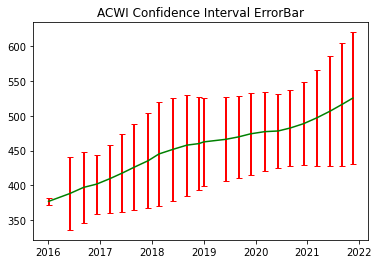

In [40]:
plt.title("ACWI Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

#### Question 3) Calculate the 95% confidence interval for Beta

##### TSM

In [41]:
cov_list = []
timelines = []
for i in range(24): 
    timelines.append(i)
    x = TSM.loc[(TSM.seperator == i)]
    y = TSM.loc[(TSM.seperator == i)].reset_index(drop=True).index.tolist()
    cov_list.append(np.cov(x["close/last"].values.tolist(), y)[0][1])
    
var_list = []
timelines = []
for i in range(24): 
    timelines.append(i)
    x = TSM.loc[(TSM.seperator == i)]
    y = TSM.loc[(TSM.seperator == i)].reset_index(drop=True).index.tolist()
    var_list.append(np.var(x["close/last"].values.tolist()))

In [42]:
beta_tsm = np.divide(cov_list ,var_list)

In [43]:
beta_tsm

array([ -5.42308133,  -6.91153386,  -5.73770204,  14.17859277,
        -6.96296197,  -7.56889836, -11.23781208,   5.23383945,
         0.14976149,   1.85633044,  -2.89063992,   3.13219841,
        -4.36603594,   6.95211311,  -1.93542091,  -2.43808861,
         1.76600861,  -1.68248701,  -0.70916459,  -1.68617159,
         0.80022532,  -0.17835094,  -0.48609066,  -1.53606699])

In [44]:
y_list = []
error_list= []
import math
for i in range(1,25): 
    if i == 1:
        beta_tsm_mean = beta_tsm[0]
        beta_tsm_std = 1
        y_list.append(beta_tsm_mean)

        z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*
                     

        pop_stdev = beta_tsm_std # Get the prices standard deviation

        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(beta_tsm)))

        confidence_interval_beta_tsm = (beta_tsm_mean - margin_of_error,
                            beta_tsm_mean + margin_of_error)  
        error_list.append(confidence_interval_beta_tsm[1] - confidence_interval_beta_tsm[0])
        print("Confidence interval for Quarter 1:")
        print(confidence_interval_beta_tsm)
    else:
        beta_tsm_mean = beta_tsm[:i].mean()
        beta_tsm_std = beta_tsm[:i].std()
        y_list.append(beta_tsm_mean)

        z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*
                     

        pop_stdev = beta_tsm_std # Get the prices standard deviation

        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(beta_tsm)))

        confidence_interval_beta_tsm = (beta_tsm_mean - margin_of_error,
                            beta_tsm_mean + margin_of_error)  
        error_list.append(confidence_interval_beta_tsm[1] - confidence_interval_beta_tsm[0])

        print("Confidence interval for Quarter:",i)
        print(confidence_interval_beta_tsm)

Confidence interval for Quarter 1:
(-5.758835666213463, -5.08732698494724)
Confidence interval for Quarter: 2
(-6.417184794262908, -5.917430394078214)
Confidence interval for Quarter: 3
(-6.2391621086290625, -5.809049380079943)
Confidence interval for Quarter: 4
(-3.9165173678780647, 1.9696551366151764)
Confidence interval for Quarter: 5
(-4.923876436725692, 0.5812018651265665)
Confidence interval for Quarter: 6
(-5.672829070999303, -0.46903252653663685)
Confidence interval for Quarter: 7
(-6.830586738534667, -1.6446695100476014)
Confidence interval for Quarter: 8
(-5.697386962005651, -0.41000239221426327)
Confidence interval for Quarter: 9
(-5.213068011806982, -0.18244219386982863)
Confidence interval for Quarter: 10
(-4.672272406998884, 0.18757930912558907)
Confidence interval for Quarter: 11
(-4.618970590563227, 0.01640597073500416)
Confidence interval for Quarter: 12
(-4.124073663087982, 0.4270891624170676)
Confidence interval for Quarter: 13
(-4.240029207457005, 0.1557302934609117

<ErrorbarContainer object of 3 artists>

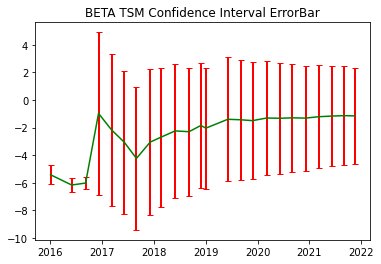

In [45]:
plt.title("BETA TSM Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

#### FTFADGI

In [46]:
cov_list = []
timelines = []
for i in range(24): 
    timelines.append(i)
    x = FTFADGI.loc[(FTFADGI.seperator == i)]
    y = FTFADGI.loc[(FTFADGI.seperator == i)].reset_index(drop=True).index.tolist()
    cov_list.append(np.cov(x["price"].values.tolist(), y)[0][1])
    
var_list = []
timelines = []
for i in range(24): 
    timelines.append(i)
    x = FTFADGI.loc[(FTFADGI.seperator == i)]
    y = FTFADGI.loc[(FTFADGI.seperator == i)].reset_index(drop=True).index.tolist()
    var_list.append(np.var(x["price"].values.tolist()))

In [47]:
beta_ftfadgi = np.divide(cov_list ,var_list)

In [48]:
y_list = []
error_list= []
import math
for i in range(1,25): 
    if i == 1:
        beta_ftfadgi_mean = beta_ftfadgi[0]
        beta_ftfadgi_std = 1
        y_list.append(beta_ftfadgi_mean)

        z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*
                     

        pop_stdev = beta_ftfadgi_std # Get the prices standard deviation

        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(beta_ftfadgi)))

        confidence_interval_beta_ftfadgi = (beta_ftfadgi_mean - margin_of_error,
                            beta_ftfadgi_mean + margin_of_error)  
        error_list.append(confidence_interval_beta_ftfadgi[1] - confidence_interval_beta_ftfadgi[0])
        print("Beta Confidence interval for Quarter 1:")
        print(confidence_interval_beta_ftfadgi)
    else:
        beta_ftfadgi_mean = beta_ftfadgi[:i].mean()
        beta_ftfadgi_std = beta_ftfadgi[:i].std()
        y_list.append(beta_ftfadgi_mean)

        z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*
                     

        pop_stdev = beta_ftfadgi_std # Get the prices standard deviation

        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(beta_ftfadgi)))

        confidence_interval_beta_ftfadgi = (beta_ftfadgi_mean - margin_of_error,
                            beta_ftfadgi_mean + margin_of_error)  
        error_list.append(confidence_interval_beta_ftfadgi[1] - confidence_interval_beta_ftfadgi[0])

        print("Beta Confidence interval for Quarter:",i)
        print(confidence_interval_beta_ftfadgi)

Beta Confidence interval for Quarter 1:
(-0.3973314304192878, 0.2741772508469355)
Beta Confidence interval for Quarter: 2
(-0.007603101482013392, 0.04696105139984673)
Beta Confidence interval for Quarter: 3
(0.05710612637163335, 0.1472214659408555)
Beta Confidence interval for Quarter: 4
(0.020469460567755254, 0.10964907625972417)
Beta Confidence interval for Quarter: 5
(0.020530583393594544, 0.10052698610025762)
Beta Confidence interval for Quarter: 6
(0.037207618594438364, 0.11356585840574981)
Beta Confidence interval for Quarter: 7
(0.050157159760102585, 0.12326366043418686)
Beta Confidence interval for Quarter: 8
(0.06408941779576026, 0.1366536737865719)
Beta Confidence interval for Quarter: 9
(0.07284776589760857, 0.14268972314222983)
Beta Confidence interval for Quarter: 10
(0.06899926855661415, 0.13608806707393128)
Beta Confidence interval for Quarter: 11
(0.0495113844324141, 0.12248954139352733)
Beta Confidence interval for Quarter: 12
(0.05074017586794482, 0.12061514020516267)

<ErrorbarContainer object of 3 artists>

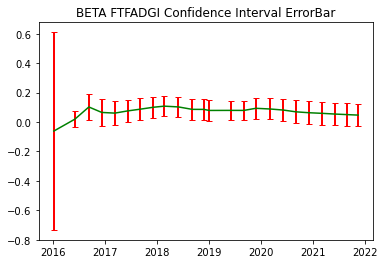

In [49]:
plt.title("BETA FTFADGI Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

#### SHOP 

In [50]:
cov_list = []
timelines = []
for i in range(24): 
    timelines.append(i)
    x = SHOP.loc[(SHOP.seperator == i)]
    y = SHOP.loc[(SHOP.seperator == i)].reset_index(drop=True).index.tolist()
    cov_list.append(np.cov(x["close/last"].values.tolist(), y)[0][1])
    
var_list = []
timelines = []
for i in range(24): 
    timelines.append(i)
    x = SHOP.loc[(SHOP.seperator == i)]
    y = SHOP.loc[(SHOP.seperator == i)].reset_index(drop=True).index.tolist()
    var_list.append(np.var(x["close/last"].values.tolist()))

In [51]:
beta_shop = np.divide(cov_list ,var_list)

In [52]:
y_list = []
error_list= []
import math
for i in range(1,25): 
    if i == 1:
        beta_shop_mean = beta_shop[0]
        beta_shop_std = 1
        y_list.append(beta_shop_mean)

        z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*
                     

        pop_stdev = beta_shop_std # Get the prices standard deviation

        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(beta_shop)))

        confidence_interval_beta_shop = (beta_shop_mean - margin_of_error,
                            beta_shop_mean + margin_of_error)  
        error_list.append(confidence_interval_beta_shop[1] - confidence_interval_beta_shop[0])
        print("Beta Confidence interval for Quarter 1:")
        print(confidence_interval_beta_shop)
    else:
        beta_shop_mean = beta_shop[:i].mean()
        beta_shop_std = beta_shop[:i].std()
        y_list.append(beta_shop_mean)

        z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*
                     

        pop_stdev = beta_shop_std # Get the prices standard deviation

        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(beta_shop)))

        confidence_interval_beta_shop = (beta_shop_mean - margin_of_error,
                            beta_shop_mean + margin_of_error)  
        error_list.append(confidence_interval_beta_shop[1] - confidence_interval_beta_shop[0])

        print("Beta Confidence interval for Quarter:",i)
        print(confidence_interval_beta_shop)

Beta Confidence interval for Quarter 1:
(-3.5515603125303326, -2.8800516312641093)
Beta Confidence interval for Quarter: 2
(-1.2433283502537025, 0.7507168164086271)
Beta Confidence interval for Quarter: 3
(-1.967746819539884, -0.16329348590168735)
Beta Confidence interval for Quarter: 4
(-1.9232892158215678, -0.35814134364613404)
Beta Confidence interval for Quarter: 5
(-1.915783924139018, -0.5124084392075811)
Beta Confidence interval for Quarter: 6
(-1.827170857606209, -0.5453895088511592)
Beta Confidence interval for Quarter: 7
(-1.7500543137683806, -0.5623236273039898)
Beta Confidence interval for Quarter: 8
(-1.656049416139224, -0.5402546081835375)
Beta Confidence interval for Quarter: 9
(-1.6008561718976235, -0.5479063695970455)
Beta Confidence interval for Quarter: 10
(-1.5372759632510404, -0.5354264533133001)
Beta Confidence interval for Quarter: 11
(-1.3948364055048783, -0.3928088412583932)
Beta Confidence interval for Quarter: 12
(-1.3429822581973192, -0.380997946480263)
Beta 

<ErrorbarContainer object of 3 artists>

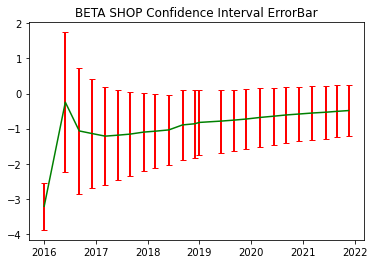

In [53]:
plt.title("BETA SHOP Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

#### AMD

In [54]:
cov_list = []
timelines = []
for i in range(24): 
    timelines.append(i)
    x = AMD.loc[(AMD.seperator == i)]
    y = AMD.loc[(AMD.seperator == i)].reset_index(drop=True).index.tolist()
    cov_list.append(np.cov(x["close/last"].values.tolist(), y)[0][1])
    
var_list = []
timelines = []
for i in range(24): 
    timelines.append(i)
    x = AMD.loc[(AMD.seperator == i)]
    y = AMD.loc[(AMD.seperator == i)].reset_index(drop=True).index.tolist()
    var_list.append(np.var(x["close/last"].values.tolist()))

In [55]:
beta_amd = np.divide(cov_list, var_list)

In [56]:
y_list = []
error_list= []
import math
for i in range(1,25): 
    if i == 1:
        beta_amd_mean = beta_amd[0]
        beta_amd_std = 1
        y_list.append(beta_amd_mean)

        z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*
                     

        pop_stdev = beta_amd_std # Get the prices standard deviation

        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(beta_amd)))

        confidence_interval_beta_amd = (beta_amd_mean - margin_of_error,
                            beta_amd_mean + margin_of_error)  
        error_list.append(confidence_interval_beta_amd[1] - confidence_interval_beta_amd[0])
        print("Beta Confidence interval for Quarter 1:")
        print(confidence_interval_beta_amd)
    else:
        beta_amd_mean = beta_amd[:i].mean()
        beta_amd_std = beta_amd[:i].std()
        y_list.append(beta_amd_mean)

        z_critical = stats.norm.ppf(q = 0.95)  # Get the z-critical value*
                     

        pop_stdev = beta_amd_std # Get the prices standard deviation

        margin_of_error = z_critical * (pop_stdev/math.sqrt(len(beta_amd)))

        confidence_interval_beta_amd = (beta_amd_mean - margin_of_error,
                            beta_amd_mean + margin_of_error)  
        error_list.append(confidence_interval_beta_amd[1] - confidence_interval_beta_amd[0])

        print("Beta Confidence interval for Quarter:",i)
        print(confidence_interval_beta_amd)

Beta Confidence interval for Quarter 1:
(-26.29081589468793, -25.619307213421706)
Beta Confidence interval for Quarter: 2
(-21.890973994776623, -17.78244872404693)
Beta Confidence interval for Quarter: 3
(-18.41559033187756, -13.397158533696487)
Beta Confidence interval for Quarter: 4
(-16.181329541830888, -11.098174890090714)
Beta Confidence interval for Quarter: 5
(-14.769203387994535, -9.895387104877182)
Beta Confidence interval for Quarter: 6
(-12.933965557304273, -7.44195166745785)
Beta Confidence interval for Quarter: 7
(-10.445272581390604, -2.487631204232748)
Beta Confidence interval for Quarter: 8
(-8.814709988867602, -0.8128386616240499)
Beta Confidence interval for Quarter: 9
(-7.358040456850295, 0.6940485080053875)
Beta Confidence interval for Quarter: 10
(-7.383290100387809, 0.26904339493473906)
Beta Confidence interval for Quarter: 11
(-7.0470555071800955, 0.2572873649591445)
Beta Confidence interval for Quarter: 12
(-6.536137770054843, 0.5085535589634627)
Beta Confidence

<ErrorbarContainer object of 3 artists>

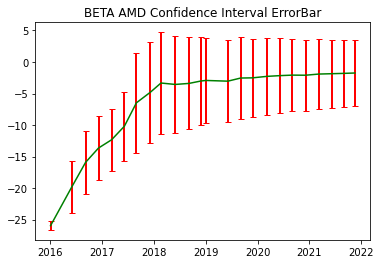

In [57]:
plt.title("BETA AMD Confidence Interval ErrorBar")
plt.errorbar(x= idx_list,y = y_list, yerr = error_list,color = 'green', 
            ecolor = 'red', elinewidth = 2, capsize= 3)

A stock that is less volatile, or has fewer price swings, than the aggregate market has a beta value of less than one. A low beta value typically means that the stock is considered less risky, but will likely offer low returns as well.

So low-beta stocks pose less risk but also lower returns, whereas high-beta stocks pose high risk but also higher returns

### Question 4) Hypothesis testing

I want you to propose and design three hypothesis tests that you can ask of the data, and then carry out the resulting calculations and communicate the results. 

1) mean of original data is same with point estimates mean dataset

In [58]:
TSM["close/last"].mean()

55.733057409879805

In [59]:
print(tsm_point_estimates_mean.point_estimates_mean.mean() )

55.88023180385185


Notice that we used a slightly different combination of distributions to generate the sample data by taking quarter point estimates, so we know that the two means are different. Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the prices. To conduct a one sample t-test, we can the stats.ttest_1samp() function

In [60]:
stats.ttest_1samp(a = TSM["close/last"],               # Sample data
                 popmean = tsm_point_estimates_mean.point_estimates_mean.mean())

Ttest_1sampResult(statistic=-0.17818181220000145, pvalue=0.8586043010926698)

The test result shows the test statistic "t" is equal to -0.17. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

2) We can see extreme results in the sample dataset in the original dataset too.

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [61]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [62]:
stats.t.cdf(x= -0.17,      # T-test statistic
               df= 49)

0.43285504638230665

In [63]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = tsm_point_estimates_mean.mean(), # Sample mean
                 scale= tsm_point_estimates_mean.std()/math.sqrt(len(tsm_point_estimates_mean.timeline_number)))

(array([ 7.63182252, 38.00276847]), array([15.36817748, 73.75769514]))

With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean, thus making it less likely that we'll reject the null hypothesis. In this case, the p-value  is greater than our significance level and we fail to reject the null hypothesis.

Hyphothesis 3)

In [64]:
#Hyphothesis 3)
#Null Hypothesis : Pay does not increase in 2016
#Alternate Hypothesis: It increases
#Prices parameters: Mean = pop_mean_2017, standard deviation = pop_std_2016
#Sample parameters : Mean = sample_mean_2017, standard deviation = sample_std_2016

In [65]:
TSM = TSM.reset_index()
pop_mean_2017 = TSM.loc[TSM.date.astype(str).str.contains("2017-")]["close/last"].mean()
pop_std_2017 = TSM.loc[TSM.date.astype(str).str.contains("2016-")]["close/last"].std()

sample_mean_2017 = tsm_point_estimates_mean[4:8].point_estimates_mean.mean()
sample_std_2016 = tsm_point_estimates_mean[:4].point_estimates_mean.std()



In [66]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2017 - pop_mean_2017)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

-0.5496249278638777


In [67]:
pop_mean_2017 = TSM.loc[TSM.date.astype(str).str.contains("2017-")]["close/last"].mean()
pop_std_2017 = TSM.loc[TSM.date.astype(str).str.contains("2016-")]["close/last"].std()

sample_mean_2017 = tsm_point_estimates_mean[4:8].point_estimates_mean.mean()
sample_std_2016 = tsm_point_estimates_mean[:4].point_estimates_mean.std()



##### Conclusion: As the test statistics fall into the rejection region the null hypothesis is rejected
##### and it can be concluded that the prices increase in 2017.